Randomness policy:  You must derive your personal seed and assigned settings from your student email/ID as shown below in the code. All random draws must use this seed. Your notebook must display your seed and assigned parameters in the first section.

	Reproducibility & Personalization:  (show the code below at the top cell of your notebook):
	The code below will use your studentID/email to generate personalized seed and other parameters
	(like dataset selection and other hyper parameters that are needed for the project)
	Please add your student ID or UMKC email to “STUDENT_ID_STR” variable (highlighted below)
	to generate your project parameters and use these throughout in your project.
	Failure to do so will cause reduction of lot of points.

Code:
```
import hashlib, numpy as np, random

STUDENT_ID_STR = "your_school_email_or_studentID_here"

# Personal seed derived from hash (stable, unique)
seed = int(hashlib.sha256(STUDENT_ID_STR.encode()).hexdigest(), 16) % (10**9)
rng = np.random.default_rng(seed)
random.seed(seed)
np.random.seed(seed)

# Assigned parameters (unique to each student)
dataset_pick     = rng.integers(0, 3)                 # 0/1/2 choose dataset
cv_folds         = int(rng.choice([4,5,6,7,8]))       # K for K-fold CV
bootstrap_B      = int(rng.choice([400, 600, 800]))   # bootstrap replicates
outlier_method   = rng.choice(["IQR", "zscore"])      # handling strategy
knn_k            = int(rng.choice([3,5,7,9]))         # K for KNN
tree_depth       = int(rng.choice([3,4,5,6,7]))       # max depth for trees
sim_bias_p       = float(rng.choice([0.35, 0.45, 0.55, 0.65]))  # for simulation
viz_trick        = rng.choice(["truncated_y", "unequal_bins", "dual_axis"])  # ethics plot variant

print({
    "seed": seed, "dataset_pick": int(dataset_pick), "cv_folds": cv_folds,
    "bootstrap_B": bootstrap_B, "outlier_method": outlier_method,
    "knn_k": knn_k, "tree_depth": tree_depth, "sim_bias_p": sim_bias_p,
    "viz_trick": viz_trick
})
```




Dataset assignment :
The output of the above code will tell you which dataset to use based on following mapping:

	dataset_pick = 0 → sklearn.datasets.load_breast_cancer() (binary classification)

	dataset_pick = 1 → sklearn.datasets.load_wine() (multiclass; convert to binary: class 0 vs others)

	dataset_pick = 2 → sklearn.datasets.load_iris() (multiclass; convert to binary: setosa vs non-setosa)

Convert to a binary classification target as specified above (for consistency with confusion-matrix/ROC tasks).

Academic Integrity & Reproducibility
	Put the seed/assignment dictionary printout at the top of your notebook (Part 0).
	Set all random_state/np.random/rng to your seed.


In [58]:
import hashlib, numpy as np, random

STUDENT_ID_STR = "jv3c8@umsystem.edu"

# Personal seed derived from hash (stable, unique)
seed = int(hashlib.sha256(STUDENT_ID_STR.encode()).hexdigest(), 16) % (10**9)
rng = np.random.default_rng(seed)
random.seed(seed)
np.random.seed(seed)    # Sets the random seed (8083450)

# Assigned parameters (unique to each student)
dataset_pick     = rng.integers(0, 3)                 # 0/1/2 choose dataset
cv_folds         = int(rng.choice([4,5,6,7,8]))       # K for K-fold CV
bootstrap_B      = int(rng.choice([400, 600, 800]))   # bootstrap replicates
outlier_method   = rng.choice(["IQR", "zscore"])      # handling strategy
knn_k            = int(rng.choice([3,5,7,9]))         # K for KNN
tree_depth       = int(rng.choice([3,4,5,6,7]))       # max depth for trees
sim_bias_p       = float(rng.choice([0.35, 0.45, 0.55, 0.65]))  # for simulation
viz_trick        = rng.choice(["truncated_y", "unequal_bins", "dual_axis"])  # ethics plot variant

output_params = {
    "seed": seed,
    "dataset_pick": int(dataset_pick),
    "cv_folds": cv_folds,
    "bootstrap_B": bootstrap_B,
    "outlier_method": outlier_method,
    "knn_k": knn_k,
    "tree_depth": tree_depth,
    "sim_bias_p": sim_bias_p,
    "viz_trick": viz_trick
}

for key, value in output_params.items():
    print(f"{key}: {value}")

seed: 8083450
dataset_pick: 2
cv_folds: 7
bootstrap_B: 600
outlier_method: IQR
knn_k: 3
tree_depth: 4
sim_bias_p: 0.45
viz_trick: truncated_y


In [73]:
#df <- sklearn.datasets.load_iris() #(multiclass; convert to binary: setosa vs non-setosa)
from sklearn import datasets
import pandas as pd

# Load the Iris dataset
irisData = datasets.load_iris()

# Convert to DataFrame for easy viewing
df = pd.DataFrame(irisData.data, columns=irisData.feature_names)

df['target'] = irisData.target # Target variable (species: 0 for setosa, 1 for versicolor, 2 for virginica)
df['target_names'] = [irisData.target_names[i] for i in irisData.target] # Convert target

#Code gleaned from my repo for Assignment 1, Question 1
df['IsSetosa'] = (df['target'] == 0).astype('boolean')
df['IsVersicolor'] = (df['target'] == 1).astype('boolean')  #Not required, but might be useful downstream
df['IsVirginica'] = (df['target'] == 2).astype('boolean')   #Not required, but might be useful downstream

df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,IsSetosa,IsVersicolor,IsVirginica
0,5.1,3.5,1.4,0.2,0,setosa,True,False,False
1,4.9,3.0,1.4,0.2,0,setosa,True,False,False
2,4.7,3.2,1.3,0.2,0,setosa,True,False,False
3,4.6,3.1,1.5,0.2,0,setosa,True,False,False
4,5.0,3.6,1.4,0.2,0,setosa,True,False,False
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,False,False,True
146,6.3,2.5,5.0,1.9,2,virginica,False,False,True
147,6.5,3.0,5.2,2.0,2,virginica,False,False,True
148,6.2,3.4,5.4,2.3,2,virginica,False,False,True


In [74]:
# Assign each row a random fold (5-fold)
folds = [1,2,3,4,5,6,7]

#To ensure even distribution, create a repeated list of groups to cover all rows in df
kfold_groups = np.tile(folds, len(df) // len(folds) + 1)[:len(df)]

#Shuffle to randomize order
np.random.shuffle(kfold_groups)

# Assign to new column
df['k_fold_group'] = kfold_groups

# Notes on Discovery:

*Source: https://www.geeksforgeeks.org/data-science/iris-dataset/*

The Iris dataset consists of 150 samples of iris flowers from three different species: Setosa, Versicolor, and Virginica. Each sample includes four features: sepal length, sepal width, petal length, and petal width. It was introduced by the British biologist and statistician Ronald Fisher in 1936 as an example of discriminant analysis.

The Iris dataset is often used as a beginner's dataset to understand classification and clustering algorithms in machine learning. By using the features of the iris flowers, researchers and data scientists can classify each sample into one of the three species.

This dataset is particularly popular due to its simplicity and the clear separation of the different species based on the features provided. The four features are all measured in centimeters.

Sepal Length: The length of the iris flower's sepals (the green leaf-like structures that encase the flower bud).
Sepal Width: The width of the iris flower's sepals.
Petal Length: The length of the iris flower's petals (the colored structures of the flower).
Petal Width: The width of the iris flower's petals.
The target variable represents the species of the iris flower and has three classes: Iris setosa, Iris versicolor, and Iris virginica.

Iris setosa: Characterized by its relatively small size, with distinctive characteristics in sepal and petal dimensions.
Iris versicolor: Moderate in size, with features falling between those of Iris setosa and Iris virginica.
Iris virginica: Generally larger in size, with notable differences in sepal and petal dimensions compared to the other two species.

In [75]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,IsSetosa,IsVersicolor,IsVirginica,k_fold_group
0,5.1,3.5,1.4,0.2,0,setosa,True,False,False,2
1,4.9,3.0,1.4,0.2,0,setosa,True,False,False,6
2,4.7,3.2,1.3,0.2,0,setosa,True,False,False,6
3,4.6,3.1,1.5,0.2,0,setosa,True,False,False,3
4,5.0,3.6,1.4,0.2,0,setosa,True,False,False,3
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,False,False,True,1
146,6.3,2.5,5.0,1.9,2,virginica,False,False,True,1
147,6.5,3.0,5.2,2.0,2,virginica,False,False,True,6
148,6.2,3.4,5.4,2.3,2,virginica,False,False,True,6


# Part A — Ethics & Graphics Literacy (Lecture 8) — 15 pts
Generate a misleading chart: **truncated_y**

Make a bar chart whose y-axis starts at a high value, exaggerating differences.

Explain the trick: In 4–6 sentences, describe exactly why the graphic is misleading and how an uninformed reader could be deceived.

Fix it: Replot the graphic ethically (e.g., start y at 0, use equal bin widths or density, avoid dual-axis or clearly normalize/annotate). Add a caption explaining the fix.

Grading: correctness of identification, clarity of explanation, and quality of the corrected plot.

{'seed': 8083450, 'dataset_pick': 2, 'viz_trick': np.str_('truncated_y')}


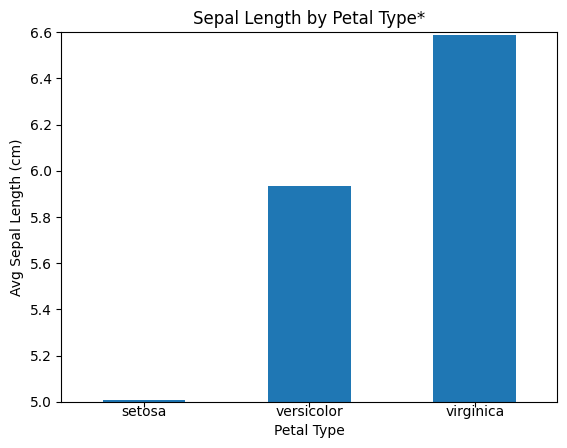

Explain the trick: In 4–6 sentences, describe exactly why the graphic is misleading and how an uninformed reader could be deceived.
I selected the Sepal Length, because the variation between the min and max of the range is 1.582 (around 30% of the mean for each species).
Knowing that the minimum value was 5.006, I set the y-axis to start at 5.0. This toys with the reader's assumptions and makes the sepal length look non-existent.
Knowinng that the highest value was 6.588, I set the height of the chart to 6.6, further exaggerating the variance.
An uninformed reader would be mislead to assume there is a dramatic difference between the sepal width of the three iris species.


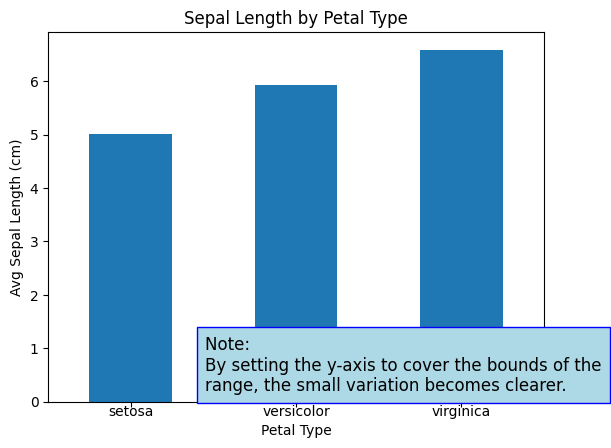

In [119]:
print({
    "seed": seed, "dataset_pick": int(dataset_pick),
    "viz_trick": viz_trick
})
#Code gleaned from Assignment 1, Question 2, Visualization #3

import matplotlib.pyplot as plt
import numpy as np

average_sepal_length = df.groupby('target_names')['sepal length (cm)'].mean()
average_sepal_length.plot(kind='bar')

plt.title('Sepal Length by Petal Type*')
plt.xlabel('Petal Type')
plt.ylabel('Avg Sepal Length (cm)')
plt.ylim(5, 6.6) # Set y-axis
plt.xticks(rotation=0, ha='center', va='center') # Rotate x-axis labels for better readability
plt.show()

print("Explain the trick: In 4–6 sentences, describe exactly why the graphic is misleading and how an uninformed reader could be deceived.",
      "I selected the Sepal Length, because the variation between the min and max of the range is 1.582 (around 30% of the mean for each species).",
      "Knowing that the minimum value was 5.006, I set the y-axis to start at 5.0. This toys with the reader's assumptions and makes the sepal length look non-existent.",
      "Knowinng that the highest value was 6.588, I set the height of the chart to 6.6, further exaggerating the variance.",
      "An uninformed reader would be mislead to assume there is a dramatic difference between the sepal width of the three iris species.",
      sep="\n")

average_sepal_length = df.groupby('target_names')['sepal length (cm)'].mean()
average_sepal_length.plot(kind='bar')


JVinasComment = "Note: \nBy setting the y-axis to cover the bounds of the range, the small variation becomes clearer."
plt.text(0.45, 0.25, JVinasComment, fontsize=12, color='black', wrap=True, bbox=dict(boxstyle='square,pad=0.5', fc='lightblue', ec='blue'))

plt.title('Sepal Length by Petal Type')
plt.xlabel('Petal Type')
plt.ylabel('Avg Sepal Length (cm)')
plt.ylim(0) #, top=10)
plt.xticks(rotation=0, ha='center', va='center') # Rotate x-axis labels for better readability
plt.show()

#Part B
**Sampling, Standard Error, Bootstrap, Outliers (Lecture 9) — 20 pts**

Using your assigned tabular dataset (dataset is assigned based on code provided above):

**Sampling with/without replacement:**
Draw samples of sizes n ∈ {30, 60, 120, 240} both with replacement and without replacement.
For a chosen continuous feature (pick the feature with highest variance), estimate the sample mean and standard error (SE) under both schemes.

Plot SE vs n and discuss how SE changes with n and why with-replacement SE approximations differ from without-replacement (finite-population correction).

**Bootstrap the mean of the same feature:**
Use bootstrap_B replicates (coming from the code above); build a 95% confidence interval (CI) (percentile method).
Compare the bootstrap CI width to the theoretical SE-based CI. Briefly interpret.

**Outliers:**
Inject 1% synthetic outliers into that feature (e.g., add +8σ values at random indices using your seed).
Handle outliers using your assigned method outlier_method (IQR trimming/winsorizing or z-score filtering).
Recompute mean & CI; compare before vs after in 3–5 sentences.

**Brief concept explanations:**

“add +8σ values at random indices using your seed”
Pick one numeric feature.
Compute its mean μ and standard deviation σ.
Randomly choose ~1% of row indices (using your personal seed).
For those rows, inflate the feature to create outliers:

`X.loc[idx, feature] = mu + 8*sigma (or even X.loc[idx, f] += 8*sigma).`

This simulates extreme values far from the bulk of the data.
“IQR trimming/winsorizing” vs “z-score filtering”
IQR method (interquartile range):
Compute Q1 (25th pct), Q3 (75th pct), IQR = Q3–Q1.
Trimming: remove rows with values < Q1−1.5·IQR or > Q3+1.5·IQR.
Winsorizing: cap values below Q1−1.5·IQR up to that lower bound, and above Q3+1.5·IQR down to that upper bound (keeps all rows; reduces outlier impact).
z-score filtering:
Standardize the feature: z=(x-μ)/σ.
Remove (or cap) rows where ∣z∣>k(common k = 3).
This assumes roughly bell-shaped data; IQR is more robust for skewed data.


In [212]:
feature_list = ['sepal length (cm)',
                'sepal width (cm)',
                'petal length (cm)',
              'petal width (cm)']           #Build a list of valid features to work through
variances = df[feature_list].var()          #Get the variance (difference between min/max) for each feature

print(variances)
use_feature = variances.idxmax()            #Use the feature with the highest (max) variance

print("Selection: " + use_feature)

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64
Selection: petal length (cm)


In [213]:
import numpy as np
import pandas as pd

feature_population = df[use_feature].values #Build a list using only these values

pop_stddev = np.std(feature_population)
pop_mean = np.mean(feature_population)


#Draw samples of sizes n ∈ {30, 60, 120, 240} both with replacement and without replacement.
sample_sizes = [30, 60, 120, 240]

sample_results = {"With Replacement": {}, "Without Replacement": {}}
for n in sample_sizes:
  if n >= len(feature_population):
    sample_results["With Replacement"][n] = np.random.choice(feature_population, size=n, replace=True)
  else:
    sample_results["With Replacement"][n] = np.random.choice(feature_population, size=n, replace=True)
    sample_results["Without Replacement"][n] = np.random.choice(feature_population, size=n, replace=False)

#Create an empty dataframe
results_table = pd.DataFrame({
    'Sample Size': pd.Series(dtype='int'),
    'Replacement': pd.Series(dtype='boolean'),
    'Mean': pd.Series(dtype='float'),
    'Std Dev': pd.Series(dtype='float'),
    'Std Err': pd.Series(dtype='float')
})

#Estimate the sample mean and standard error (SE) under both schemes.
for n in sample_sizes:
  for curSubset in ["With Replacement", "Without Replacement"]:
    if n >= len(feature_population) and curSubset == "Without Replacement":
      continue
    else:
      used_replacement = curSubset == "With Replacement"
      new_result = pd.DataFrame(
      {
        'Sample Size': [n],
        'Replacement': [used_replacement],
        'Mean': [np.mean(sample_results[curSubset][n])],
        'Std Dev': [np.std(sample_results[curSubset][n])],
        'Std Err': [np.std(sample_results[curSubset][n]) / np.sqrt(n)]
      }
      )
      results_table = pd.concat([results_table, new_result], ignore_index=True)

results_table

,Sample Size,Replacement,Mean,Std Dev,Std Err
0,30,True,3.826667,1.585756,0.289518
1,30,False,3.876667,1.736987,0.317129
2,60,True,3.903333,1.792667,0.231432
3,60,False,3.653333,1.803189,0.232791
4,120,True,3.742500,1.740003,0.158840
5,120,False,3.784167,1.774636,0.162001
6,240,True,3.702917,1.726253,0.111429


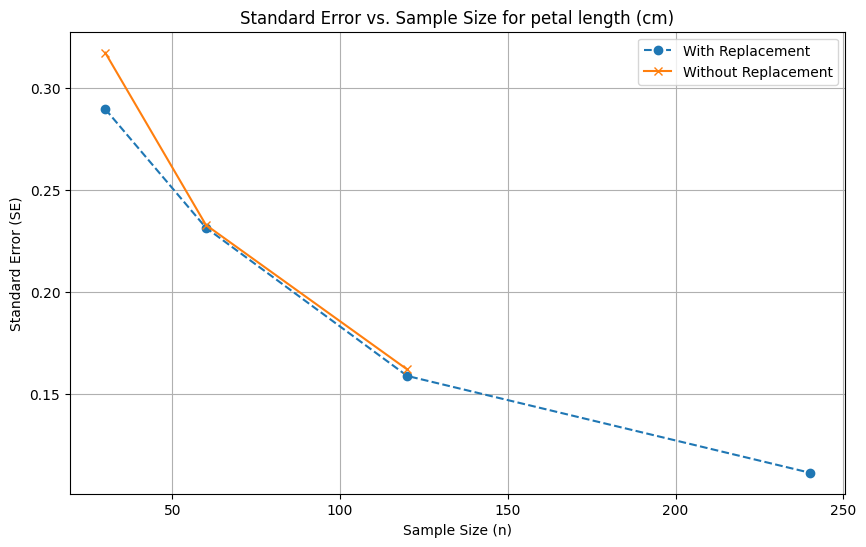

In [214]:
#Plot SE vs n
#Discuss how SE changes with n
#Discuss why with-replacement SE approximations differ from without-replacement (finite-population correction).

import matplotlib.pyplot as plt

# Filter data for 'With Replacement'
df_with_replacement = results_table[results_table['Replacement'] == True].copy()

# Filter data for 'Without Replacement', dropping NaN SE values which occur when n > population_size
df_without_replacement = results_table[results_table['Replacement'] == False].dropna(subset=['Std Err']).copy()

plt.figure(figsize=(10, 6))

# Plot 'With Replacement'
plt.plot(df_with_replacement['Sample Size'], df_with_replacement['Std Err'], marker='o', label='With Replacement', linestyle='--')

# Plot 'Without Replacement'
plt.plot(df_without_replacement['Sample Size'], df_without_replacement['Std Err'], marker='x', label='Without Replacement', linestyle='-')

plt.title('Standard Error vs. Sample Size for ' + use_feature)
plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error (SE)')
plt.grid(True)
plt.legend()
plt.show()

The standard error (SE) is the standard deviation of the mean in repeated samples from a population. As the size of the population increases, the SE decreases. It is calculated as the std. dev. of the sample divided by the square root of the sample size. As the sample size increases, the standard error will tend to fall. This is illustrated in the chart above.

Sampling with replacement allows for a single sample to be selected multiple times. Sampling without replacement means that once a sample is selected, it cannot be reused.
Sampling with replacement results in each sample being independent of the other samples as the outcome of one random draw is not affected by the previous draw.
We can't run "Without Replacement" for the sample size of 240 samples because the raw dataset only has 150 samples to work with. Once we have used up the 150 samples, there are no further samples available to reference.

This nuance is particularly important when working with small datasets, such as the iris dataset which only has 150 samples.

In [232]:
#**Bootstrap the mean of the same feature:**
#Use bootstrap_B replicates (coming from the code above); build a 95% confidence interval (CI) (percentile method).
#Compare the bootstrap CI width to the theoretical SE-based CI. Briefly interpret.

bootstrap_means = []
for _ in range(bootstrap_B):
    # Draw a sample with replacement from feature_population
    bootstrap_sample = rng.choice(feature_population, size=len(feature_population), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Convert to array to get the percentile calculation
bootstrap_means = np.array(bootstrap_means)

#Figure out the 95% confidence interval
lower_bound_bootstrap = np.percentile(bootstrap_means, 2.5)
upper_bound_bootstrap = np.percentile(bootstrap_means, 97.5)

#Compare the bootstrap confidence interval with the theoretical CI
pop_std = np.std(feature_population, ddof=1) # Using ddof=1 for sample std dev as best estimate for population
pop_mean = np.mean(feature_population)

#Figure out what the standard Error of the mean for the full population size would have been
ideal_se = pop_std / np.sqrt(len(feature_population))

#Per the Z-Score chart, a 95% CI's z-score is about 1.96
ideal_margin_of_error = 1.96 * ideal_se

lower_bound_theoretical = pop_mean - ideal_margin_of_error
upper_bound_theoretical = pop_mean + ideal_margin_of_error

print(f"Bootstrap 95% Confidence Interval for the mean of {use_feature}:")
print(f" Lower bound: {lower_bound_bootstrap:.3f}")
print(f" Upper bound: {upper_bound_bootstrap:.3f}")
print(f" Range: {upper_bound_bootstrap - lower_bound_bootstrap:.3f}")
print("\n")
print(f"Theoretical 95% Confidence Interval for the mean of {use_feature}:")
print(f" Lower bound: {lower_bound_theoretical:.3f}")
print(f" Upper bound: {upper_bound_theoretical:.3f}")
print(f" Range: {upper_bound_theoretical - lower_bound_theoretical:.3f}")

Bootstrap 95% Confidence Interval for the mean of petal length (cm):
 Lower bound: 3.482
 Upper bound: 4.030
 Range: 0.548


Theoretical 95% Confidence Interval for the mean of petal length (cm):
 Lower bound: 3.475
 Upper bound: 4.041
 Range: 0.565


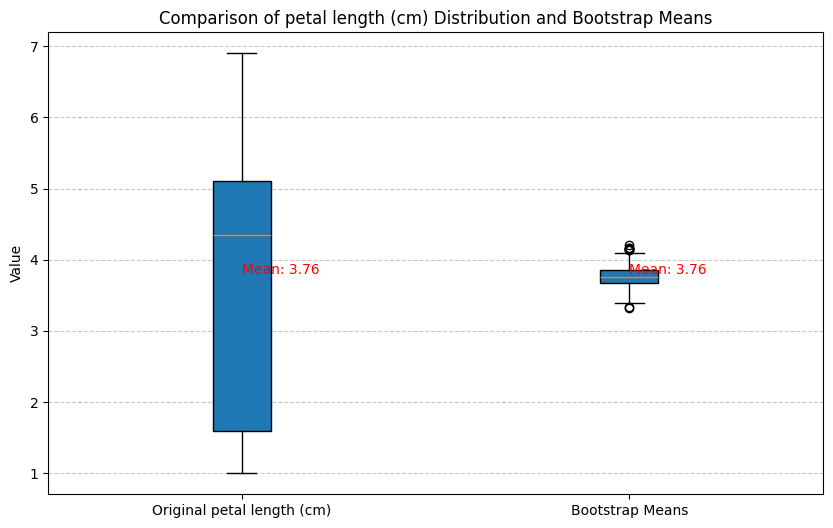

In [226]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for the boxplot
data_to_plot = [feature_population, bootstrap_means]
labels = [f'Original {use_feature}', 'Bootstrap Means']

# Calculate the means
mean_original = np.mean(feature_population)
mean_bootstrap = np.mean(bootstrap_means)

# Create the boxplot, removing 'showmeans=True'
plt.figure(figsize=(10, 6))
bp = plt.boxplot(data_to_plot, tick_labels=labels, patch_artist=True)

# Add titles and labels
plt.title(f'Comparison of {use_feature} Distribution and Bootstrap Means')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the mean values on the boxplot
# The x-coordinates for the boxes are 1 and 2
plt.text(1, mean_original, f'Mean: {mean_original:.2f}',
         verticalalignment='bottom', horizontalalignment='left', color='red', fontsize=10)
plt.text(2, mean_bootstrap, f'Mean: {mean_bootstrap:.2f}',
         verticalalignment='bottom', horizontalalignment='left', color='red', fontsize=10)

plt.show()

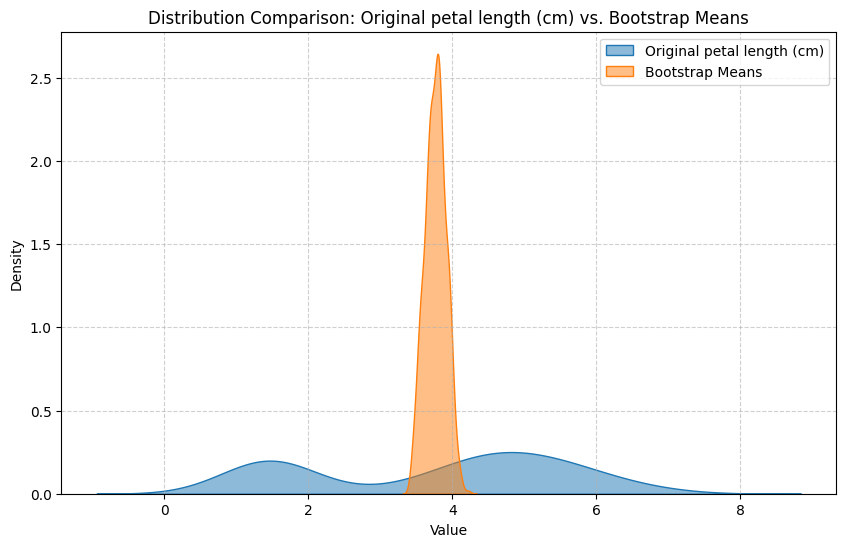

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(feature_population, label=f'Original {use_feature}', fill=True, alpha=0.5)
sns.kdeplot(bootstrap_means, label='Bootstrap Means', fill=True, alpha=0.5)

plt.title(f'Distribution Comparison: Original {use_feature} vs. Bootstrap Means')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Interpretation

The theoretical range with a 95% confidence intervale for petal length against the source data is 0.565, ranging from 3.475 to 4.041.
The bootstrap results in a remarkably similar range of 0.548 with a spread from 3.482 to 4.030. This is an illustration of the central limit theorem, where datasets centralize around their mean.

Despite the data being spread much wider across the range, as displayed in the previous two charts the mean of the two datasets centralizes around the same point.

In [ ]:
# **Outliers:**
# Inject 1% synthetic outliers into that feature (e.g., add +8σ values at random indices using your seed).
# Handle outliers using your assigned method outlier_method (IQR trimming/winsorizing or z-score filtering).
# Recompute mean & CI; compare before vs after in 3–5 sentences.

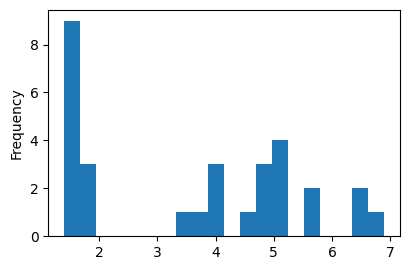

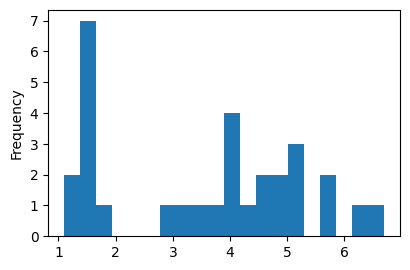

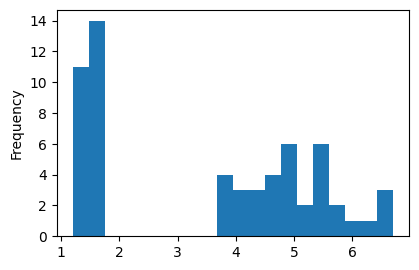

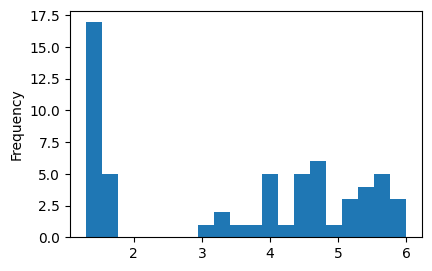

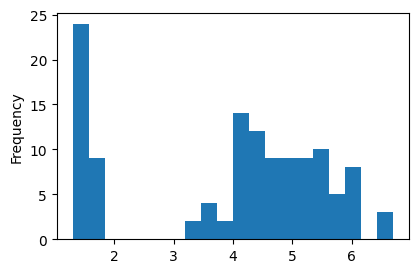

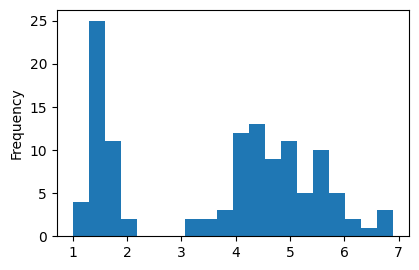

Sample size 240, With Replacement: No data available for plotting.


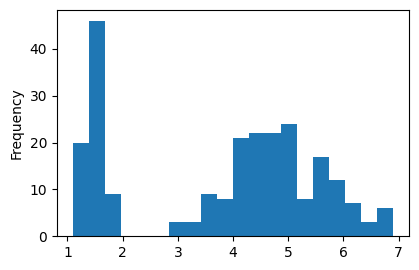

In [169]:
import pandas as pd # Ensure pandas is imported
import matplotlib.pyplot as plt # Import matplotlib for showing plots

for n in sample_sizes:
  for curSubset in ["With Replacement", "Without Replacement"]:
    if n in sample_results[curSubset] and sample_results[curSubset][n] is not None:
      # Convert the numpy array to a pandas Series before plotting
      pd.Series(sample_results[curSubset][n]).plot.hist(subplots=True, layout=(3,2), figsize=(10, 10), bins=20)
      plt.title(f"Histogram for n={n} ({curSubset})") # Add title to distinguish plots
      plt.xlabel(use_feature)
      plt.ylabel("Frequency")
      plt.show() # Display each plot immediately
    else:
      print(f"Sample size {n}, {curSubset}: No data available for plotting.")

Part C — Supervised vs Unsupervised; Confusion Matrix & ROC (Lectures 10–11) — 25 pts
	Supervised (binary classification):
	Split the data (stratified) 70/30 (train/test).
	Train Logistic Regression (with regularization, default liblinear/lbfgs acceptable).
	Use K-fold CV with your cv_folds (coming from the code above) on the training set to report CV accuracy and CV ROC-AUC.
	On the test set, produce: confusion matrix, accuracy, sensitivity (recall for positive), specificity, and ROC curve with AUC.
	In 5–8 sentences, interpret: TP/TN/FP/FN counts (what kind of mistakes), trade-offs, and whether threshold adjustment could align with a plausible cost scenario.
	Unsupervised (structure discovery):
	Standardize numeric features, run KMeans (k=2).
	Compare clusters to the true binary labels using Adjusted Rand Index (ARI); briefly interpret what a high vs low ARI implies about separability without labels.
	Parametric/non-parametric/probabilistic (concepts):
	State which of Logistic Regression, KNN, Decision Tree, Naïve Bayes, Random Forest, MLP are parametric / non-parametric / probabilistic, with a one-line justification each (no code needed here).

Brief concept explanations:
Adjusted Rand Index (ARI)
	A clustering vs. ground-truth agreement score that corrects for chance.
	Range: [-1,1], where 1 = perfect match, 0 ≈ random labeling, negative = worse than chance.
	We use ARI to see how well unsupervised clusters (e.g., KMeans) align with true binary labels—even though the clustering didn’t use labels.

Part D — Mini Model Zoo & Hyperparameters (Lecture 11) — 15 pts
Train two additional models with your assigned hyperparameters:
	KNN with n_neighbors = knn_k  (coming from the code above)
	Decision Tree with max_depth = tree_depth (coming from the code above)
For each:
	Report test accuracy and balanced accuracy (to mitigate class imbalance).
	In 3–5 sentences per model, explain how it works, whether it is parametric/non-parametric/probabilistic, and the typical effect of your chosen hyperparameter on variance/bias.

Brief concept explanations:
Balanced Accuracy
	Average of recall on the positive class and recall on the negative class:
"Balanced Acc"=("TPR (sensitivity)" +"TNR (specificity)" )/2.

	Useful when classes are imbalanced; treats both classes equally.

Part E — Simulation & Randomness (Lecture 12) — 10 pts
Simulate N ∈ {100, 1,000, 10,000} coin flips with bias p = sim_bias_p (coming from the code above):
	Estimate p ̂for each N; plot p ̂vs N) to show convergence (Law of Large Numbers).
	In 3–5 sentences, explain the role of randomness in simulation, why estimates stabilize, and what would change for a smaller/larger N.



Part F — Regex & TF-IDF & Sentiment (Lecture 13) — 15 pts
	Regex:
	Create a small raw text (8–12 lines) that includes at least emails, dates, and IDs (e.g., “ORD-1234”).
	Write regex patterns to extract: all emails, all dates (flexible formats), and all “ID-like” tokens (prefix+digits). Show the matches.
	Briefly explain alternation, character sets, anchors, and quantifiers you used (1–2 lines each).
	NLP mini-task:
	Build a tiny labeled corpus of 10–16 sentences (half “positive”, half “negative”).
	Compute TF-IDF features and train Logistic Regression to classify sentiment.
	Answer: What happens to TF-IDF of a term that appears in all documents vs. a term that appears in few documents? Why? (3–4 sentences)

# Task
Assign a 'data_group' column (from 1 to 5) to each of the 5 split dataframes (result), then concatenate them back into a single DataFrame. Finally, display the head and tail of the resulting DataFrame to confirm the new 'data_group' column.

## Assign Data Group and Concatenate

### Subtask:
Assign a 'data_group' column (from 1 to 5) to each of the 5 split dataframes (result), then concatenate them back into a single DataFrame.


**Reasoning**:
To assign a 'data_group' column to each split DataFrame and then concatenate them, I will iterate through the `result` list, add the new column with a unique group number, and finally use `pd.concat` to merge them into a single DataFrame.



In [13]:
import pandas as pd

# Initialize an empty list to store the modified DataFrames
modified_dfs = []

# Iterate through the result list, assign a 'data_group' and append to modified_dfs
for i, df_split in enumerate(result):
    df_split_copy = df_split.copy() # Make a copy to avoid SettingWithCopyWarning
    df_split_copy['data_group'] = i + 1  # Assign data_group from 1 to 5
    modified_dfs.append(df_split_copy)

# Concatenate all DataFrames in the list into a single DataFrame
df_with_groups = pd.concat(modified_dfs, ignore_index=True)

print(f"Shape of the concatenated DataFrame: {df_with_groups.shape}")
print("Head of df_with_groups:")
print(df_with_groups.head())
print("Tail of df_with_groups:")
print(df_with_groups.tail())

Shape of the concatenated DataFrame: (150, 9)
Head of df_with_groups:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.4               3.7                1.5               0.2   
1                4.8               3.0                1.4               0.1   
2                5.0               3.3                1.4               0.2   
3                5.1               3.3                1.7               0.5   
4                6.1               2.8                4.0               1.3   

   target  IsSetosa  IsVersicolor  IsVirginica  data_group  
0       0      True         False        False           1  
1       0      True         False        False           1  
2       0      True         False        False           1  
3       0      True         False        False           1  
4       1     False          True        False           1  
Tail of df_with_groups:
     sepal length (cm)  sepal width (cm)  petal length (cm)  peta

## Final Task

### Subtask:
Review the shuffled DataFrame with the added 'data_group' column and ensure it meets the requirements.


## Summary:

### Q&A
The new `data_group` column has been successfully assigned to the concatenated DataFrame, with values ranging from 1 to 5, as confirmed by inspecting the head and tail of the resulting DataFrame.

### Data Analysis Key Findings
*   A new `data_group` column was successfully added to each of the 5 split DataFrames.
*   The `data_group` column was assigned values from 1 to 5, corresponding to the original split DataFrame each row belonged to.
*   All modified DataFrames were concatenated back into a single DataFrame named `df_with_groups`.
*   The final `df_with_groups` DataFrame has a shape of (150, 9), indicating that all original rows were preserved and one new column (`data_group`) was added.
*   The `head()` and `tail()` outputs confirmed the presence and correct assignment of the `data_group` column, showing `data_group=1` for the initial rows and `data_group=5` for the final rows.

### Insights or Next Steps
*   The `df_with_groups` DataFrame is now prepared for further analysis or modeling, allowing for group-specific operations based on the `data_group` column.
*   A logical next step would be to shuffle `df_with_groups` to thoroughly mix the data from different groups.
